# Flair Detector

In [11]:
import pandas as pd

df = pd.read_csv('reddit-india-data.csv')

In [12]:
df.head()

,id,flair,title,upvotes,comments,upvote_ratio,stickied
0,g1zi21,Coronavirus,Coronavirus (COVID-19) Megathread - News and U...,202,3935,0.97,True
1,fzub9j,Official Announcement,"Announcing r/IndiaMeme, our own sub for memes ...",326,89,0.89,True
2,g8s2sw,Food,"Woke up dreaming of Pav Bhaji. 3 hours later, ...",3219,210,0.95,False
3,g8mr2h,Coronavirus,Indian man travels 1400 kms after buying 28 to...,1065,85,0.99,False
4,g8ud9g,Coronavirus,India Bought 'Overpriced' Chinese COVID-19 Tes...,163,25,0.98,False


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['flair'] = le.fit_transform(df['flair'].astype(str))

In [14]:
df = df.sample(frac=1)
X = df.drop(columns=['id', 'flair', 'title'])
y = df['flair']

In [15]:
print(X.head())
print(y.head())
print(le.classes_)

     upvotes  comments  upvote_ratio  stickied
586        5         0          0.99     False
462       28        20          0.78     False
545       37         0          0.91     False
667        0         0          0.38     False
540       20         2          0.78     False
586    3
462    5
545    3
667    3
540    9
Name: flair, dtype: int64
['AskIndia' 'Business/Finance' 'CAA-NRC-NPR' 'Coronavirus' 'Food'
 'Non-Political' 'Official Announcement' 'Photography' 'Policy/Economy'
 'Politics' 'Scheduled' 'Science/Technology' 'Sports' 'TIL' 'nan']


In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
clf = SVC(gamma='auto')
scores = cross_val_score(clf, X, y, cv=5)
scores

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.36477987, 0.32692308, 0.35947712, 0.38513514, 0.375     ])

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
y_pred = cross_val_predict(clf, X, y, cv=5)
accuracy_score(y, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.3618421052631579

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
y_pred = cross_val_predict(clf, X, y, cv=5)
accuracy_score(y, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.3868421052631579

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=1000)
y_pred = cross_val_predict(clf, X, y, cv=5)
accuracy_score(y, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.38421052631578945

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.49      0.59      0.53       107
           1       0.11      0.04      0.06        24
           2       0.00      0.00      0.00         7
           3       0.45      0.58      0.51       269
           4       0.29      0.14      0.19        14
           5       0.17      0.14      0.15       113
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        16
           8       0.03      0.02      0.02        58
           9       0.47      0.44      0.45       119
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3

    accuracy                           0.38       760
   macro avg       0.13      0.13      0.13       760
weighted avg       0.34   

[Text(0, 0.5, 'nan'),
 Text(0, 1.5, 'TIL'),
 Text(0, 2.5, 'Sports'),
 Text(0, 3.5, 'Science/Technology'),
 Text(0, 4.5, 'Scheduled'),
 Text(0, 5.5, 'Politics'),
 Text(0, 6.5, 'Policy/Economy'),
 Text(0, 7.5, 'Photography'),
 Text(0, 8.5, 'Official Announcement'),
 Text(0, 9.5, 'Non-Political'),
 Text(0, 10.5, 'Food'),
 Text(0, 11.5, 'Coronavirus'),
 Text(0, 12.5, 'CAA-NRC-NPR'),
 Text(0, 13.5, 'Business/Finance'),
 Text(0, 14.5, 'AskIndia')]

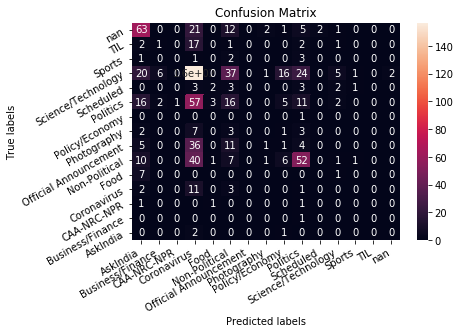

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))

ax= plt.subplot()
seaborn.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(le.classes_), rotation=30, ha="right")
ax.yaxis.set_ticklabels(reversed(list(le.classes_)), rotation=30)